# Construct Quad Tree

Given a `n * n` matrix `grid` of `0's` and `1's` only. We want to represent `grid` with a Quad-Tree.

Return the root of the Quad-Tree representing `grid`.

A Quad-Tree is a tree data structure in which each internal node has exactly four children. Besides, each node has two attributes:

- `val`: True if the node represents a grid of `1's` or False if the node represents a grid of `0's`. Notice that you can assign the `val` to `True` or `False` when `isLeaf` is `False`, and both are accepted in the answer.
- `isLeaf`: `True` if the node is a leaf node on the tree or `False` if the node has four children.

```Python
class Node {
    public boolean val;
    public boolean isLeaf;
    public Node topLeft;
    public Node topRight;
    public Node bottomLeft;
    public Node bottomRight;
}
```

We can construct a Quad-Tree from a two-dimensional area using the following steps:

1. If the current grid has the same value (i.e all `1's` or all `0's`) set `isLeaf` `True` and set `val` to the value of the grid and set the four children to `Null` and stop.
2. If the current grid has different values, set `isLeaf` to `False` and set `val` to any value and divide the current grid into four sub-grids as shown in the photo.
3. Recurse for each of the children with the proper sub-grid.

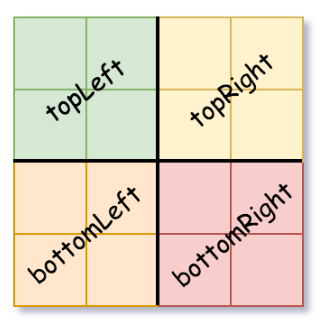

## Examples

**Example 1:**
```
Input: grid = [[0,1],[1,0]]
Output: [[0,1],[1,0],[1,1],[1,1],[1,0]]
```
Explanation: The explanation of this example is shown below:

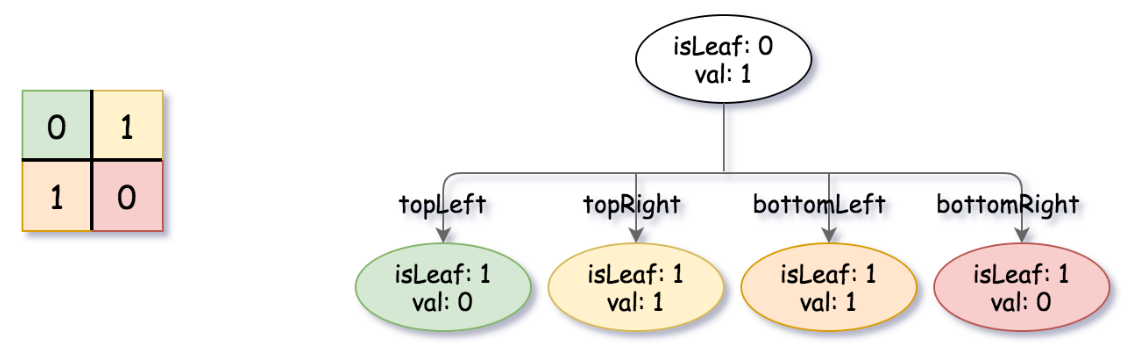

Notice that 0 represents False and 1 represents True in the photo representing the Quad-Tree.

**Example 2:**
```
Input: grid = [[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0]]
Output: [[0,1],[1,1],[0,1],[1,1],[1,0],null,null,null,null,[1,0],[1,0],[1,1],[1,1]]
```
Explanation: 
- All values in the grid are not the same. We divide the grid into four sub-grids.
- The topLeft, bottomLeft and bottomRight each has the same value.
- The topRight have different values so we divide it into 4 sub-grids where each has the same value.

Explanation is shown in the photo below:

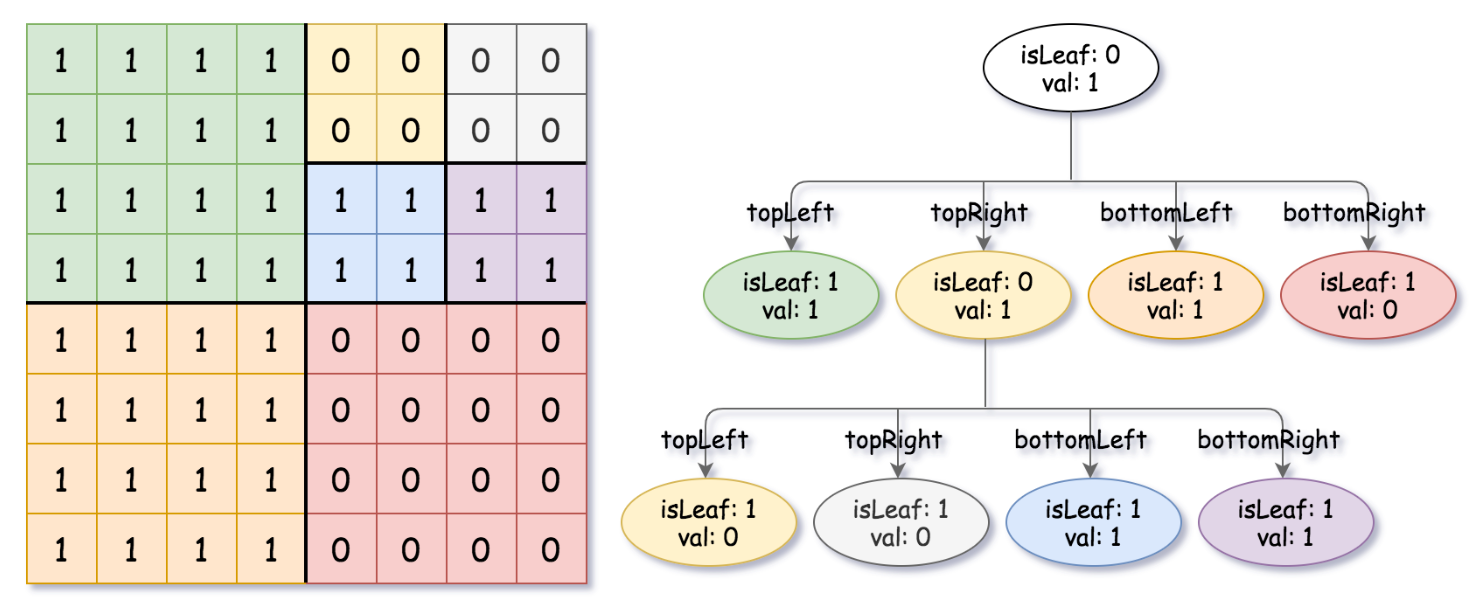

In [2]:
# Definition for a QuadTree node.
class Node:
    def __init__(self, val, isLeaf, topLeft, topRight, bottomLeft, bottomRight):
        self.val = val
        self.isLeaf = isLeaf
        self.topLeft = topLeft
        self.topRight = topRight
        self.bottomLeft = bottomLeft
        self.bottomRight = bottomRight


class Solution:
    def isLeaf(self, grid):
        pivot = grid[0][0]
        for i in range(len(grid)):
            for j in range(len(grid)):
                if grid[i][j] != pivot:
                    return False
        return True

    def construct(self, grid: list[list[int]]) -> "Node":
        def helper(grid):
            if len(grid) == 0:
                return None
            if self.isLeaf(grid):
                return Node(val=(grid[0][0] == 1), isLeaf=True)
            half_len = len(grid) // 2
            top_rows = grid[0:half_len]
            bottom_rows = grid[half_len:]
            top_left = [row[0:half_len] for row in top_rows]
            top_right = [row[half_len:] for row in top_rows]
            bottom_left = [row[0:half_len] for row in bottom_rows]
            bottom_right = [row[half_len:] for row in bottom_rows]

            return Node(
                val=(grid[0][0] == 1),
                isLeaf=False,
                topLeft=helper(top_left),
                topRight=helper(top_right),
                bottomLeft=helper(bottom_left),
                bottomRight=helper(bottom_right),
            )

        return helper(grid)